> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This is the second project in Data Analyst Nanodegree from Udacity. In this project, I analyzed <a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download">No-show appointments dataset</a></li>. I'll share my discovery about it using Python libraries like pandas, numpy, matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

<a id='intro'></a>
## Dataset
**110,527 medical appointments, 14 associated variables (characteristics).**

> PatientId: Identity code of a patient.

> AppointmentID: Identification code of each appointment.

> Gender: Male (M) or Female (F).

> ScheduledDay: Effective date to make an appointment.

> AppointmentDay: The day of the actuall appointment to be seen by the doctor.

> Age: The length of time that a person has lived.

> Neighbourhood: Where the appointment takes place.

> Scholarship: True (1) of False (0).
Observation, this is a broad topic, consider reading this article here.

> Hipertension: True (1) or False (0).

> Diabetes: True (1) or False (0).

> Alcoholism: True (1) or False (0).

> Handcap: The handcap refers to the number of desabilites a patient has.

> SMS_received: 1 or more messages sent to the patient.

> No-show: Yes or No.

## Question(s) for Analysis 

- Number of peope that showed up in the neighborhood
- Does a gender showed up more than the other
- Does recieving sms aid patients to show up?

In [57]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [58]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("KaggleV2-May-2016.csv")
n = 7
df.head(n)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [59]:
df.shape


(110527, 14)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [61]:
df.duplicated().sum()

0

In [62]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [63]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [64]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [65]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.shape

(110527, 12)

In [66]:
df.rename(columns={'No-show': 'show'}, inplace=True)

In [67]:
df.columns = [x.lower() for x in df.columns]

In [68]:
def mod_string(col):
    """modifies a given string"""
    if 'day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    col = col.strip().lower().replace('-','_') # for example: No-show -> no_show
    return col
    
df.rename(columns = lambda x: mod_string(x), inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [69]:
columns = ['scheduled_day', 'appointment_day']
for column in columns:
    df[column] = pd.to_datetime(pd.to_datetime(df[column]).dt.date)

df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
show                       object
dtype: object

In [70]:
negative_age = df[df['age'] < 0]
negative_age

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [71]:
df.drop(negative_age.index, inplace=True)

In [73]:
df.query('age < 0')
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [74]:
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [76]:
df.show.value_counts()

No     88207
Yes    22319
Name: show, dtype: int64

In [97]:
df[df['show'] == 'Yes'] = '1'
df[df['show'] == 'No'] = '0'
df['show'] = pd.to_numeric(df['show'])

In [98]:
df.show.value_counts()

0    88207
1    22319
Name: show, dtype: int64

In [99]:
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [106]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [108]:
df.age.nunique()

103

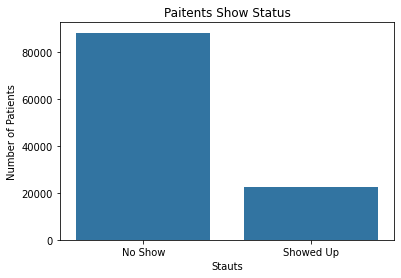

In [102]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'show', color = base_color)
plt.title('Paitents Show Status')
plt.xticks([0, 1], ['No Show', 'Showed Up'])
plt.xlabel('Stauts')
plt.ylabel('Number of Patients');

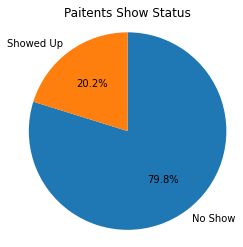

In [104]:
sorted_counts = df.show.value_counts()
plt.pie(sorted_counts, labels = ['No Show', 'Showed Up'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status');

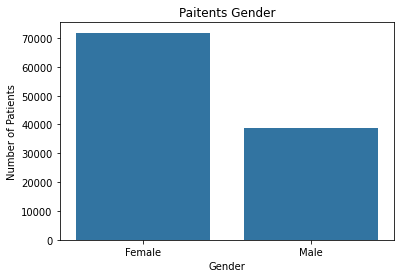

In [105]:
sns.countplot(data = df, x = 'gender', color = base_color)
plt.title('Paitents Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

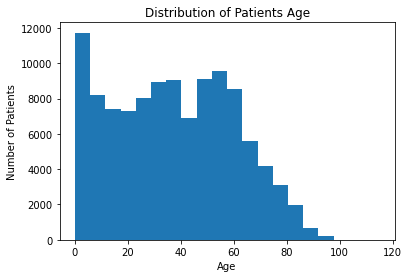

In [116]:
plt.hist(data = df, x = 'age', bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients Age');

> Age distribution, most patient are in the age group of 0-10

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Number of peope that showed up in the neighborhood)

Text(0, 0.5, 'Neighbourhood')

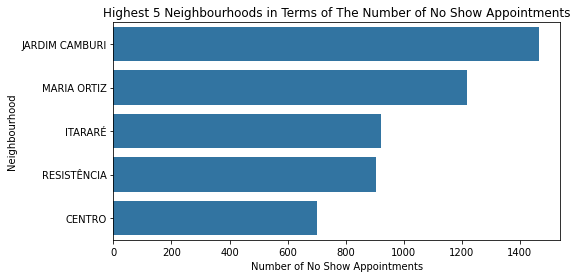

In [117]:
df_no_show = df[df['show'] == 1] 

# plot a horizontal bar chart
plt.figure(figsize = [8, 4])
cat_order = df_no_show['neighbourhood'].value_counts().index[:5]
sns.countplot(data = df_no_show, y = 'neighbourhood', color = base_color, order = cat_order)
plt.title('Highest 5 Neighbourhoods in Terms of The Number of No Show Appointments')
plt.xlabel('Number of No Show Appointments')
plt.ylabel('Neighbourhood')

> The graph above showed  the neighbourhood that didnt show up for their appointments

### Research Question 2  (Does a gender showed up more than the other?)

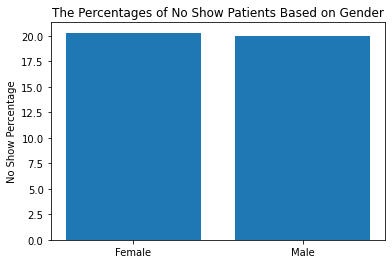

In [118]:
no_show_perc_gender = df.groupby('gender')['show'].mean() * 100

# plot a bar chart
plt.bar(x = no_show_perc_gender.index, height = no_show_perc_gender)
plt.title('The Percentages of No Show Patients Based on Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No Show Percentage');

In [120]:
no_show_perc_gender = df.groupby('gender')['show'].mean() * 100
no_show_perc_gender

gender
F    20.314871
M    19.967948
Name: show, dtype: float64

> From the result above, averagely, women showed up more than men with a little difference

<a id='conclusions'></a>
## Conclusions

> In this project I have analyzed No show Appointment Dataset and shared my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset contained 110,527 appointments in a period of 40 days, about 20% of the patients didn't show up for their appointments.

Most patients:
- Were females.
- Were young.
- Did not show up for appointments


### The following questions were answerd:
**Q1: Number of peope that showed up in the neighborhood?**




In [134]:
df_no_show = df[df['show'] == 1] 
cat_order = df_no_show['neighbourhood'].value_counts()
cat_order.head(10)

JARDIM CAMBURI       1465
MARIA ORTIZ          1219
ITARARÉ               923
RESISTÊNCIA           906
CENTRO                703
JESUS DE NAZARETH     696
JARDIM DA PENHA       631
CARATOÍRA             591
TABUAZEIRO            573
BONFIM                550
Name: neighbourhood, dtype: int64

**Q2: Does a gender showed up more than the other?**

> According to my analysis, the female gender shows up more than the male gender with a little difference 

In [135]:
no_gender = df.groupby('gender')['show'].mean() * 100
no_gender

gender
F    20.314871
M    19.967948
Name: show, dtype: float64